In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from arma import ARMA, PureARMA

In [2]:
def simulate_arma(phi=None,theta=None,sigma=1,simulations=100):
    if phi is None:
        phi = []
    if theta is None:
        theta = []
    phi = phi
    theta = [1] + theta
    Z = [np.random.normal(scale=sigma) for k in range(simulations+len(phi)+len(theta))]
    X = []
    for k in range(len(phi)):
        X.append(sum(a*b for a,b in zip(theta,Z[k:k+len(theta)])))
    for k in range(len(phi),simulations+len(phi)):
        X.append(sum(a*b for a,b in zip(theta,Z[k:k+len(theta)]))+sum(a*b for a,b in zip(phi,X[::-1][:len(phi)])))
    return np.array(X[len(phi):])

# Impulse responses

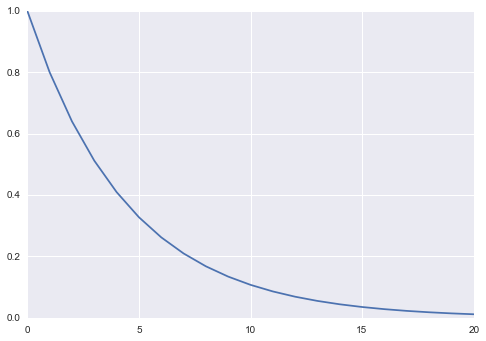

In [22]:
ar = PureARMA([0.8])
ar.plot_impulse_response()

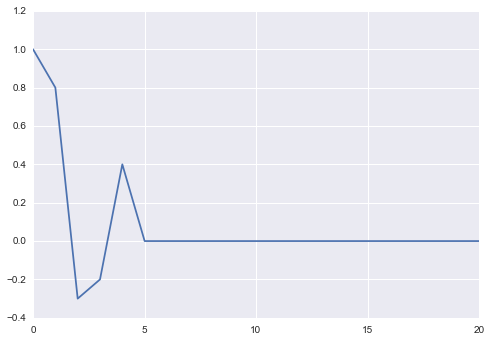

In [24]:
ma = PureARMA(theta = [0.8, -0.3, -0.2, 0.4])
ma.plot_impulse_response()

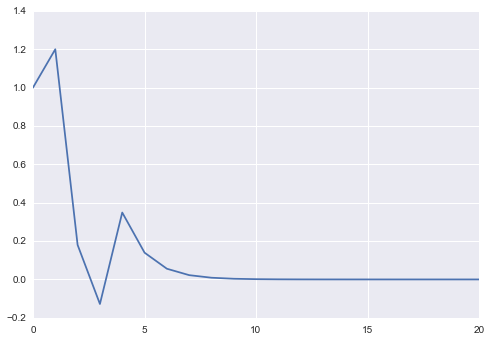

In [25]:
arma = PureARMA(phi=[0.4], theta=[0.8, -0.3, -0.2, 0.4])
arma.plot_impulse_response()

# fitting ARMA models

ARMA(4, 0) with Z_t ~ N(0, 0.26)
AR coefficients:
phi_1: 0.6
phi_2: 0.11
phi_3: 0.19
phi_4: 0.0


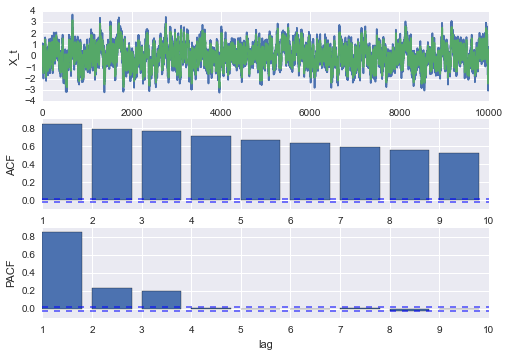

In [10]:
#simulating an AR process and fit an AR model

#select parameters
phi_ar = [0.6,0.1,0.2]
theta_ar = []
ar_order = 4
n_simulations = 10000
acf_print_limit = 10
sigma =  0.5

#simulate AR process
simulated_ar = simulate_arma(phi=phi_ar,theta=theta_ar,simulations=n_simulations,sigma=sigma)

#fit AR model
ar_model = ARMA(simulated_ar)
ar_model.fit_ar(ar_order, method='closed_form')

plt.subplot(3,1,1)
plt.plot(simulated_ar)
plt.plot(ar_model.get_training_predictions())
plt.ylabel('X_t')

plt.subplot(3,1,2)
ar_model.plot_ACF(limit=acf_print_limit)
plt.subplot(3,1,3)
ar_model.plot_PACF(limit=acf_print_limit)

ar_model.model.summary()

ARMA(2, 0) with Z_t ~ N(0, 0.24)
AR coefficients:
phi_1: 0.63
phi_2: -0.1


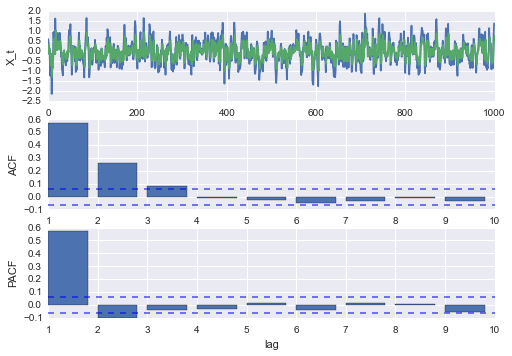

/Users/lrichter/anaconda/envs/Python34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


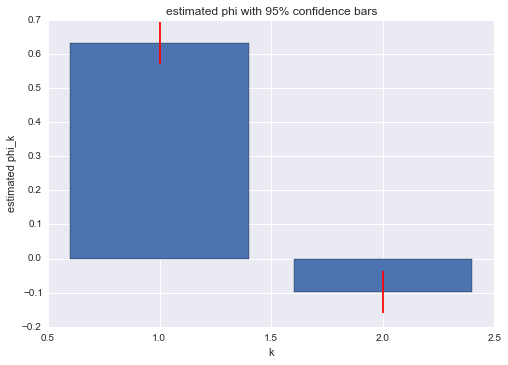

In [11]:
#simulating an AR process and fit an AR model using the durbin levinson algorithm

#select parameters
phi_ar = [0.6,-0.1]
theta_ar = []
ar_order = 2
n_simulations = 1000
acf_print_limit = 10
sigma =  0.5

#simulate AR process
simulated_ar = simulate_arma(phi=phi_ar,theta=theta_ar,simulations=n_simulations,sigma=sigma)

#fit AR model
ar_model = ARMA(simulated_ar)
ar_model.fit_ar(ar_order, method='durbin_levinson')

plt.subplot(3,1,1)
plt.plot(simulated_ar)
plt.plot(ar_model.get_training_predictions())
plt.ylabel('X_t')

plt.subplot(3,1,2)
ar_model.plot_ACF(limit=acf_print_limit)
plt.subplot(3,1,3)
ar_model.plot_PACF(limit=acf_print_limit)

ar_model.model.summary()

plt.show()

plt.bar(list(range(1,ar_order+1)),ar_model.model._phi,align='center',yerr = ar_model.get_confidence_interval_ar_d_l(),ecolor='red')
plt.xlabel('k')
plt.ylabel('estimated phi_k')
plt.title('estimated phi with 95% confidence bars')
plt.show()

ARMA(0, 2) with Z_t ~ N(0, 3.78)
MA coefficients:
theta_1: -0.06
theta_2: 0.41


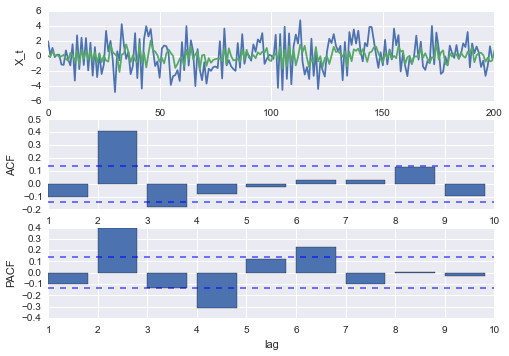

/Users/lrichter/anaconda/envs/Python34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


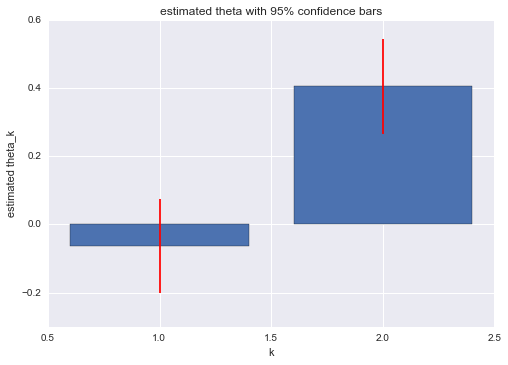

In [5]:
#simulating an MA process and fit an MA model using the durbin levinson algorithm

#select parameters
phi_ma = []
theta_ma = [0.1,0.6]
ma_order = 2
n_simulations = 200
acf_print_limit = 10
sigma =  2

#simulate MA process
simulated_ma = simulate_arma(phi=phi_ma,theta=theta_ma,simulations=n_simulations,sigma=sigma)

#fit MA model
ma_model = ARMA(simulated_ma)
ma_model.fit_ma(ma_order, method='durbin_levinson')

plt.subplot(3,1,1)
plt.plot(simulated_ma)
plt.plot(ma_model.get_training_predictions())
plt.ylabel('X_t')

plt.subplot(3,1,2)
ma_model.plot_ACF(limit=acf_print_limit)
plt.subplot(3,1,3)
ma_model.plot_PACF(limit=acf_print_limit)

ma_model.model.summary()

plt.show()

plt.bar(list(range(1,ma_order+1)),ma_model.model._theta,align='center',yerr = ma_model.get_confidence_interval_ma_d_l(),ecolor='red')
plt.xlabel('k')
plt.ylabel('estimated theta_k')
plt.title('estimated theta with 95% confidence bars')
plt.show()

ARMA(2, 1) with Z_t ~ N(0, 0.99)
AR coefficients:
phi_1: 0.67
phi_2: 0.22
MA coefficients:
theta_1: 0.63


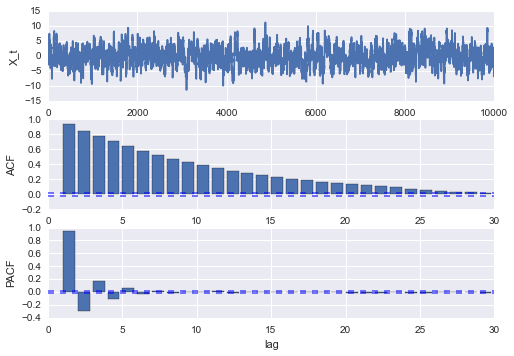

In [6]:
#simulating an ARMA process and fit an ARMA model using the durbin levinson algorithm

#select parameters
phi_arma = [0.7,0.2]
theta_arma = [0.6]
ar_order = 2
ma_order = 1
m = 10
n_simulations = 10000
acf_print_limit = 30
sigma =  1

#simulate ARMA process
simulated_arma = simulate_arma(phi=phi_arma,theta=theta_arma,simulations=n_simulations,sigma=sigma)

plt.subplot(3,1,1)
plt.plot(simulated_arma)
plt.ylabel('X_t')

#fit ARMA model
arma_model = ARMA(simulated_arma)

plt.subplot(3,1,2)
arma_model.plot_ACF(limit=acf_print_limit)
plt.subplot(3,1,3)
arma_model.plot_PACF(limit=acf_print_limit)

arma_model.fit_arma(ar_order,ma_order,method='durbin_levinson',m=m)

arma_model.model.summary()

ARMA(2, 0) with Z_t ~ N(0, 0.23)
AR coefficients:
phi_1: 0.51
phi_2: 0.08


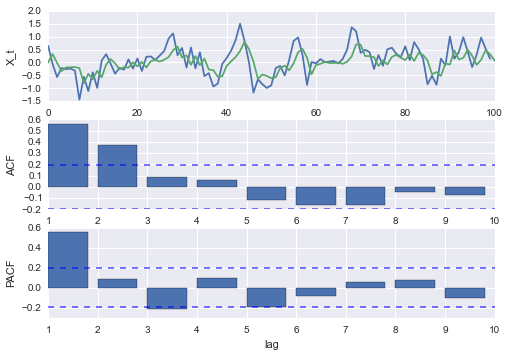

In [7]:
#simulating an AR process and fit an AR model using max likelihood

#select parameters
phi_ar = [0.6,-0.1]
theta_ar = []
ar_order = 2
n_simulations = 100
acf_print_limit = 10
sigma =  0.5

#simulate AR process
simulated_ar = simulate_arma(phi=phi_ar,theta=theta_ar,simulations=n_simulations,sigma=sigma)

#fit AR model
ar_model = ARMA(simulated_ar)
ar_model.fit_ar(2,method='min_reduced_likelihood')

plt.subplot(3,1,1)
plt.plot(simulated_ar)
plt.plot(ar_model.get_training_predictions())
plt.ylabel('X_t')

plt.subplot(3,1,2)
ar_model.plot_ACF(limit=acf_print_limit)
plt.subplot(3,1,3)
ar_model.plot_PACF(limit=acf_print_limit)

ar_model.model.summary()

plt.show()

ARMA(0, 2) with Z_t ~ N(0, 4.58)
MA coefficients:
theta_1: 0.12
theta_2: 0.63


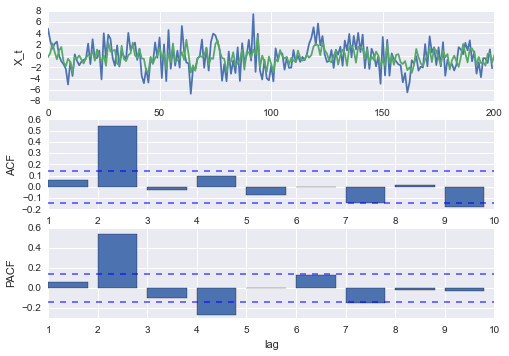

In [4]:
#simulating an MA process and fit an MA model using max likelihood

#select parameters
phi_ma = []
theta_ma = [0.1,0.6]
ma_order = 2
n_simulations = 200
acf_print_limit = 10
sigma =  2

#simulate MA process
simulated_ma = simulate_arma(phi=phi_ma,theta=theta_ma,simulations=n_simulations,sigma=sigma)

#fit MA model
ma_model = ARMA(simulated_ma)
ma_model.fit_ma(ma_order, method='min_reduced_likelihood')

plt.subplot(3,1,1)
plt.plot(simulated_ma)
plt.plot(ma_model.get_training_predictions())
plt.ylabel('X_t')

plt.subplot(3,1,2)
ma_model.plot_ACF(limit=acf_print_limit)
plt.subplot(3,1,3)
ma_model.plot_PACF(limit=acf_print_limit)

ma_model.model.summary()

plt.show()

ARMA(2, 1) with Z_t ~ N(0, 1.02)
AR coefficients:
phi_1: 0.15
phi_2: 0.33
MA coefficients:
theta_1: -0.16


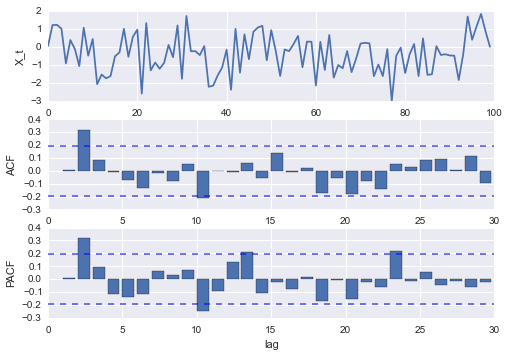

In [7]:
#simulating an ARMA process and fit an ARMA model using max likelihood

#select parameters
phi_arma = [0.7, 0.2]
theta_arma = [-0.6]
ar_order = 2
ma_order = 1
n_simulations = 100
acf_print_limit = 30
sigma =  1

#simulate ARMA process
simulated_arma = simulate_arma(phi=phi_arma,theta=theta_arma,simulations=n_simulations,sigma=sigma)

plt.subplot(3,1,1)
plt.plot(simulated_arma)
plt.ylabel('X_t')

#fit ARMA model
arma_model = ARMA(simulated_arma)

plt.subplot(3,1,2)
arma_model.plot_ACF(limit=acf_print_limit)
plt.subplot(3,1,3)
arma_model.plot_PACF(limit=acf_print_limit)

arma_model.fit_arma(ar_order,ma_order,method='min_reduced_likelihood')

arma_model.model.summary()